# TAREFA REGRESSAO LINEAR COM UMA E MULTIPLAS VARIAVEIS

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>
    
Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
    <li>numpy </li>
    <li>random </li>
    <li>matplotlib - para criação dos gráficos </li>
</ul>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

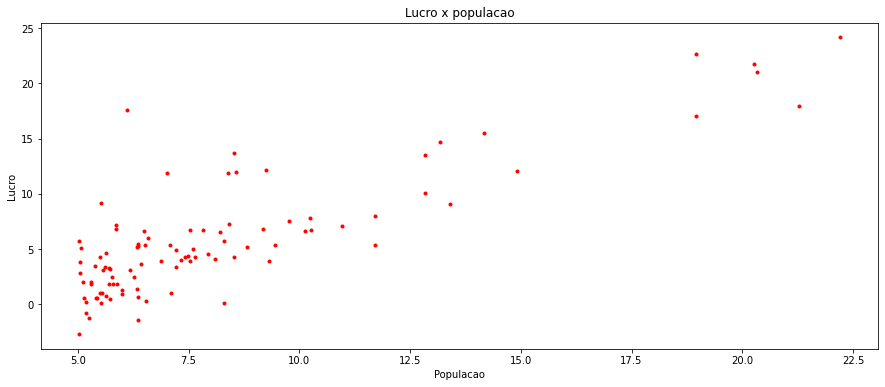

In [24]:
# Regressão linear com uma variável
# prever o lucro com um food truck

# read file
data = pd.read_csv('data1.txt', sep=",", header=None)
data.columns = ["Tamanho_Populacao", "Lucro"]

# plota grafico
plt.title(f"Lucro x populacao") 
plt.xlabel("Populacao") 
plt.ylabel("Lucro")
x = data['Tamanho_Populacao']
y = data['Lucro']
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'r.')
plt.show()

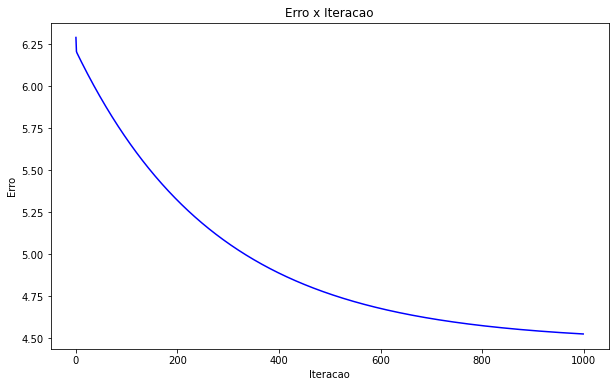

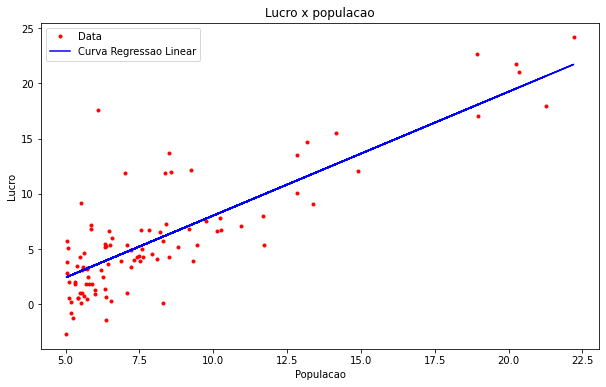

In [33]:
# calcular os parâmetros da regressão linear

# função custo em relação ao número de iterações
n_iteracoes = 1000
tx_aprendizado = 0.01
coef_angular = 1
coef_linear = 0.5

derivada_erro_angular = 0
derivada_erro_linear = 0

array_erro = []
array_reg = []

for i in range(n_iteracoes):
    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])

    derivada_erro_linear = soma/len(data)

    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])*row['Tamanho_Populacao']

    derivada_erro_angular = soma/len(data)

    coef_angular = coef_angular - (tx_aprendizado*derivada_erro_angular)
    coef_linear = coef_linear - (tx_aprendizado*derivada_erro_linear)

    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])**2

    funcao_custo = soma/(2*len(data))
    array_erro.append(funcao_custo)

for i, row in data.iterrows():
    array_reg.append(coef_angular*row['Tamanho_Populacao'] + coef_linear)

# plota grafico erro x iteracao
plt.title(f"Erro x Iteracao") 
plt.xlabel("Iteracao") 
plt.ylabel("Erro")
x = list(range(0, n_iteracoes))
y = array_erro
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'b')
plt.show()

plt.title(f"Lucro x populacao") 
plt.xlabel("Populacao") 
plt.ylabel("Lucro")
x = data['Tamanho_Populacao']
y = data['Lucro']
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'r.')
plt.plot(x, array_reg, 'b')
plt.legend(["Data", "Curva Regressao Linear"])
plt.show()

In [55]:
# Regressão linear com múltiplas variáveis
# prever o preço de uma casa

# read file
data2 = pd.read_csv('data2.txt', sep=",", header=None)
data2.columns = ["Tamanho_casa", "Num_quartos", "Preco"]

# plota df
data2

,Tamanho_casa,Num_quartos,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [56]:
# Subtraia o valor médio de cada feature do conjunto de dados e divida os valores das features pelos desvios-padrão
valor_medio_tam = data2["Tamanho_casa"].describe()['mean']
valor_medio_quartos = data2["Num_quartos"].describe()['mean']
valor_medio_preco = data2["Preco"].describe()['mean']

valor_desvio_tam = data2["Tamanho_casa"].describe()['std']
valor_desvio_quartos = data2["Num_quartos"].describe()['std']
valor_desvio_preco = data2["Preco"].describe()['std']

data2["Tamanho_casa"] = (data2["Tamanho_casa"] - valor_medio_tam) / valor_desvio_tam
data2["Num_quartos"] = (data2["Num_quartos"] - valor_medio_quartos) / valor_desvio_quartos
data2["Preco"] = (data2["Preco"] - valor_medio_preco)/valor_desvio_preco

print(data2)

    Tamanho_casa  Num_quartos     Preco
0       0.130010    -0.223675  0.475747
1      -0.504190    -0.223675 -0.084074
2       0.502476    -0.223675  0.228626
3      -0.735723    -1.537767 -0.867025
4       1.257476     1.090417  1.595389
5      -0.019732     1.090417 -0.323998
6      -0.587240    -0.223675 -0.204036
7      -0.721881    -0.223675 -1.130948
8      -0.781023    -0.223675 -1.026973
9      -0.637573    -0.223675 -0.783051
10     -0.076357     1.090417 -0.803053
11     -0.000857    -0.223675  0.052682
12     -0.139273    -0.223675 -0.083283
13      3.117292     2.404508  2.874981
14     -0.921956    -0.223675 -0.643896
15      0.376643     1.090417  0.875619
16     -0.856523    -1.537767 -0.323998
17     -0.962223    -0.223675 -1.123743
18      0.765468     1.090417  1.276275
19      1.296484     1.090417  2.068039
20     -0.294048    -0.223675 -0.699878
21     -0.141790    -1.537767 -0.683083
22     -0.499157    -0.223675 -0.779852
23     -0.048673     1.090417 -0.643896


In [64]:
def plot_3d(array_reg, data2):
    fig = plt.figure(figsize= (16,9))
    ax = plt.axes(projection = '3d')
        
    ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)
        
    my_cmap = plt.get_cmap('hsv')
        
    sctt = ax.plot_surface(data2['Tamanho_casa'],data2['Num_quartos'], data2["Preco"], alpha = 0.8, c=data2["Preco"], cmap= my_cmap, marker = '-')
        
    plt.title(f"Regressao Linear multiplas variaveis")
    ax.set_xlabel('Tamanho_casa')
    ax.set_ylabel('Num_quartos')
    ax.set_zlabel('Preco')
    fig.colorbar(sctt, ax=ax, shrink= 0.5, aspect = 5)
        
    plt.show()
    plt.clf()
    plt.close()

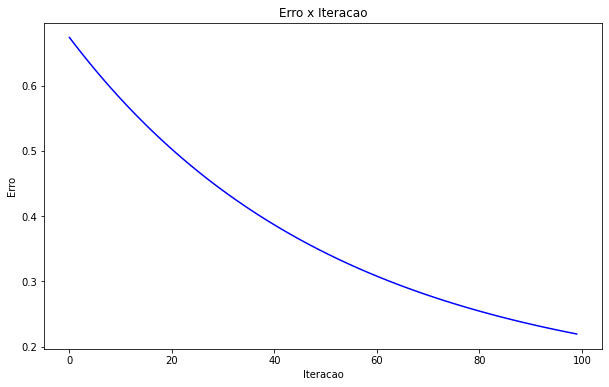

ValueError: Argument Z must be 2-dimensional.

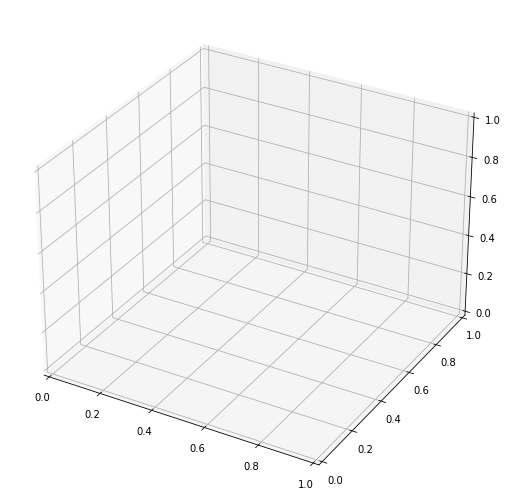

In [65]:
# Gradiente descendente
# calculo dos parâmetros da regressão linear e da função custo para o conjunto de dados

n_iteracoes = 100
tx_aprendizado = 0.01
theta0 = 1
theta1 = 0.5
theta2 = 0.25

derivada_erro_theta0 = 0
derivada_erro_theta1 = 0
derivada_erro_theta2 = 0

array_erro = []
array_reg = []

for i in range(n_iteracoes):
    soma = 0
    for i, row in data2.iterrows():
        soma += (theta1*row["Tamanho_casa"] + theta2*row["Num_quartos"] + theta0 - row['Preco'])

    derivada_erro_theta0 = soma/len(data2)

    soma = 0
    for i, row in data2.iterrows():
        soma += (theta1*row["Tamanho_casa"] + theta2*row["Num_quartos"] + theta0 - row['Preco'])*row['Tamanho_casa']

    derivada_erro_theta1 = soma/len(data2)

    soma = 0
    for i, row in data2.iterrows():
        soma += (theta1*row["Tamanho_casa"] + theta2*row["Num_quartos"] + theta0 - row['Preco'])*row['Num_quartos']

    derivada_erro_theta2 = soma/len(data2)

    theta0 = theta0 - (tx_aprendizado*derivada_erro_theta0)
    theta1 = theta1 - (tx_aprendizado*derivada_erro_theta1)
    theta2 = theta2 - (tx_aprendizado*derivada_erro_theta2)


    soma = 0
    for i, row in data2.iterrows():
        soma += (theta1*row["Tamanho_casa"] + theta2*row["Num_quartos"] + theta0 - row['Preco'])**2

    funcao_custo = soma/(2*len(data2))
    array_erro.append(funcao_custo)

for i, row in data2.iterrows():
    array_reg.append(theta1*row["Tamanho_casa"] + theta2*row["Num_quartos"] + theta0)


# plota grafico erro x iteracao
plt.title(f"Erro x Iteracao") 
plt.xlabel("Iteracao") 
plt.ylabel("Erro")
x = list(range(0, n_iteracoes))
y = array_erro
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'b')
plt.show()

# plota 3d
plot_3d(array_reg, data2)
